In [1]:
import Hokusai
import PyPlot

In [13]:
# variables/parameters
img = 1
sigma = 50
tau = 60
symmetrize = false #reversible MC?
method = :crispness #which method should be used for optimisation
ratematrix = false #select highest/lowest eigenvalue
# possible number of clusters
kmin = 3
kmax = 15

15

In [20]:
P, pi = Hokusai.getTransitionmatrixAndPi(img, sigma, tau, symmetrize, ratematrix)
# schurfactorization
X, λ = Hokusai.schurvectors(P, pi, 8, ratematrix)
# objective function
if     method == :scaling        obj = A -> Hokusai.I1(A,X)
elseif method == :metastability  obj = A -> Hokusai.I2(A,λ)
elseif method == :crispness      obj = A -> Hokusai.I3(A)
end
A = Hokusai.guessinit(X)
A = Hokusai.opt(A, X, obj)
chi = X*A
assignments = mapslices(indmax,chi,2) |> vec;

2111-element Array{Int64,1}:
 5
 8
 8
 8
 6
 6
 7
 7
 7
 7
 3
 7
 7
 ⋮
 5
 5
 4
 4
 5
 5
 8
 8
 6
 6
 8
 8

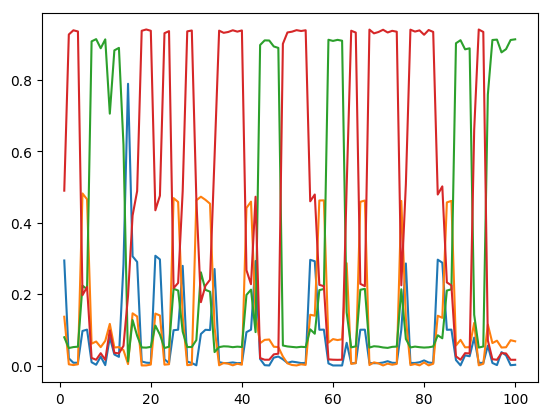

In [15]:
# plot memership vectors
N,k = size(chi)
for i = 1:k
    PyPlot.plot(1:100,chi[1:100,i])
end

In [18]:
Pc = inv(chi'*diagm(pi)*chi)*(chi'*diagm(pi)*P*chi)


4×4 Array{Float64,2}:
 0.864986    0.0179597  0.0571587  0.0598951
 0.00914355  0.858338   0.0176901  0.114828 
 0.0193552   0.0171113  0.939903   0.0236305
 0.0125448   0.0223198  0.0168518  0.948284 

In [19]:
Pp = Hokusai.getprojectionmatrix(assignments,chi)

4×4 Array{Float64,2}:
 0.495763    0.0136749  0.141422   0.34914 
 0.00339475  0.360723   0.154786   0.481096
 0.0523363   0.0488211  0.769666   0.129177
 0.00426864  0.0788728  0.0687658  0.848093

In [7]:
image = 1
# filter and prepare data
data = Hokusai.filterdata(Hokusai.DATA, image)
ts = Hokusai.TimeSeries(data);


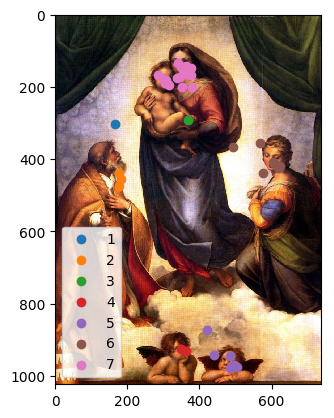

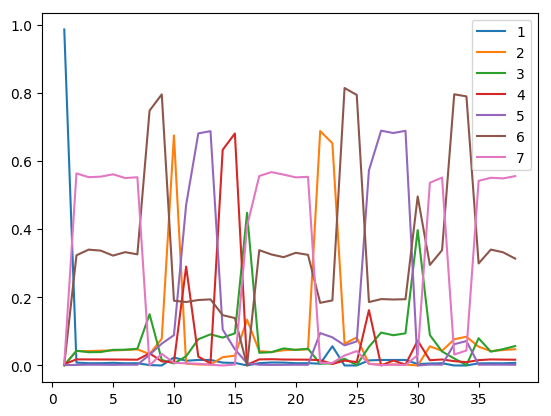

In [11]:
noCluster = 7
person = 2

timeseries = person == 0 ? ts : ts[person]

ass, chi = Hokusai.run(timeseries, noCluster, sigma, tau)
Hokusai.plotimg(image)
# plot memership vectors
N,k = size(chi)
PyPlot.figure()
for i = 1:k
    PyPlot.plot(1:N, chi[:,i], label = i)
    PyPlot.legend()
end

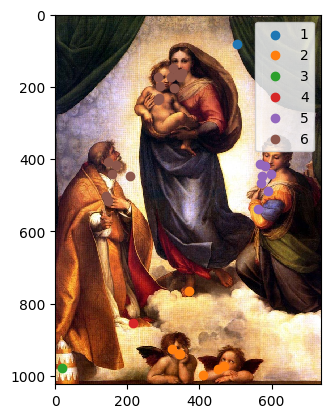

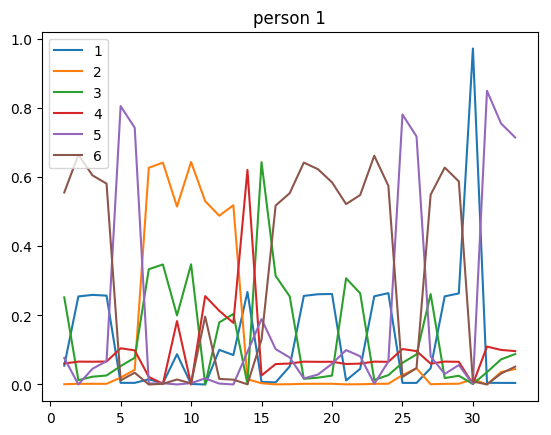

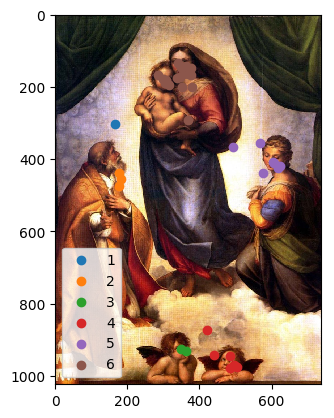

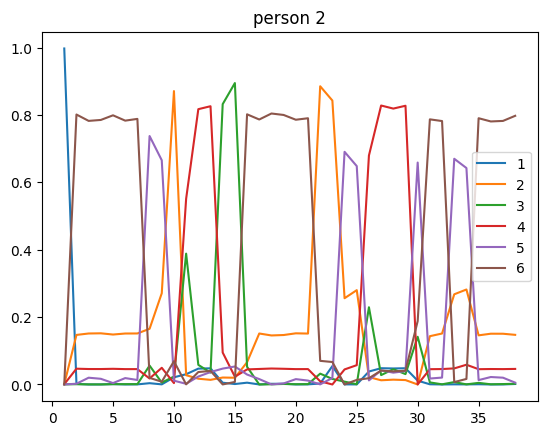

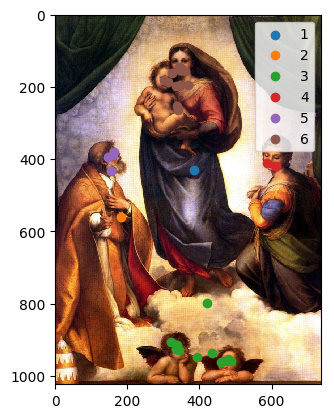

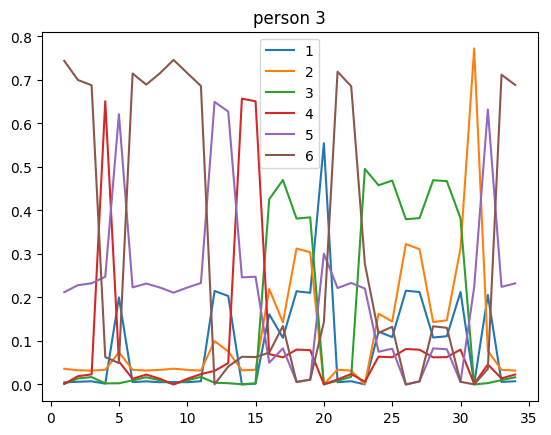

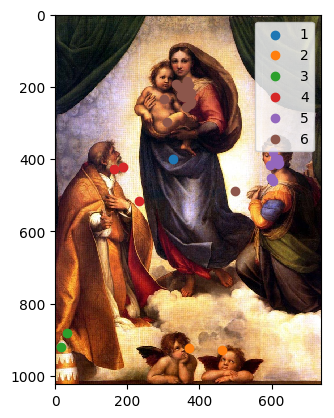

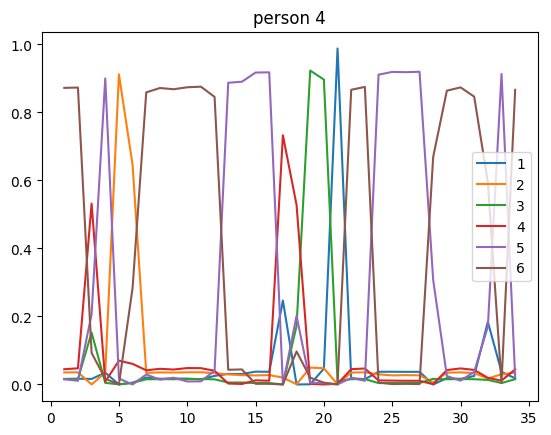

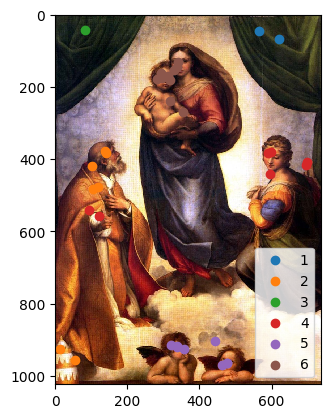

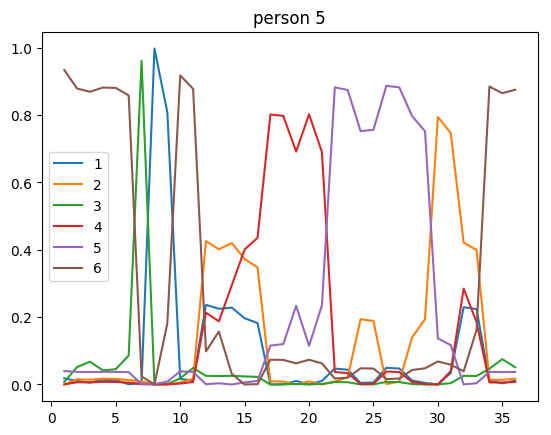

In [17]:
for person = 1:5
    ass, chi = Hokusai.run(ts[person], noCluster, sigma, tau)
    Hokusai.plotimg(image)
    # plot memership vectors
    N,k = size(chi)
    PyPlot.figure()
    for i = 1:k
        PyPlot.plot(1:N,chi[:,i], label = i)
        PyPlot.legend()
        PyPlot.title(string("person ",person))
    end
end

In [66]:
image = 1
person = 10
sigma = 50
tau = 60
symmetrize = false #reversible MC?
ratematrix = false #select highest/lowest eigenvalue
# possible number of clusters
kmin = 3
kmax = 15

data = Hokusai.filterdata(Hokusai.DATA, image)
ts = Hokusai.TimeSeries(data)

# get transition matrix
grid = Hokusai.points(ts)
sqdist = Distances.pairwise(Distances.SqEuclidean(), grid', grid')
#sum(sqdist)
#P = Hokusai.transitionmatrix(timeseries, sigma, tau, grid, symmetrize)

2111×2111 Array{Float64,2}:
      0.0        49196.9        …  64111.9         48965.9      
  49196.9            0.0            2602.73         1946.96     
  85691.5         5099.94           4592.69         8580.26     
      1.00397e5   9392.36           8697.33        14245.6      
      2.0314e5       1.58529e5         1.27629e5       1.25467e5
      2.02946e5      1.39678e5  …      1.08639e5       1.09278e5
      4.1444e5       5.96524e5         5.79282e5  543377.0      
      4.19447e5      5.84173e5         5.62778e5       5.29381e5
      3.19975e5      5.00743e5         4.90884e5       4.55356e5
      4.18471e5      5.75998e5         5.53184e5  520834.0      
      1.76313e5      2.88477e5  …      2.77439e5       2.52195e5
      2.99688e5      4.80725e5         4.72777e5  437256.0      
      3.21907e5      5.01654e5         4.91375e5       4.55991e5
      ⋮                         ⋱                      ⋮        
  15473.4        99207.7               1.10139e5   89703.9    